In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Changing the format of float number

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### Load the dataset

In [86]:
df_house_price = pd.read_csv('../../Datasets/class_exercise/house_price.csv')

In [87]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
df_house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [89]:
df_house_price.shape

(1460, 81)

###  Exploratory Data Analysis

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

df_house_price has 81 columns (79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)

In [90]:
# df_house_price.select_dtypes(include='object')
df_house_price.dtypes[df_house_price.dtypes=="object"].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [91]:
numerical_var = df_house_price.dtypes[df_house_price.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_var))

categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_var))

Number of Numerical features:  38
Number of Categorical features:  43


The main check points would be the correlation between the numeric variables and target variable with multicollinearity.

In [92]:
# 0-.3 - no corre / very low correlation
# .3-.5 - ok correlation
# .5-.7 - High correlation
# .7 - 1- Very high correlation

<Axes: >

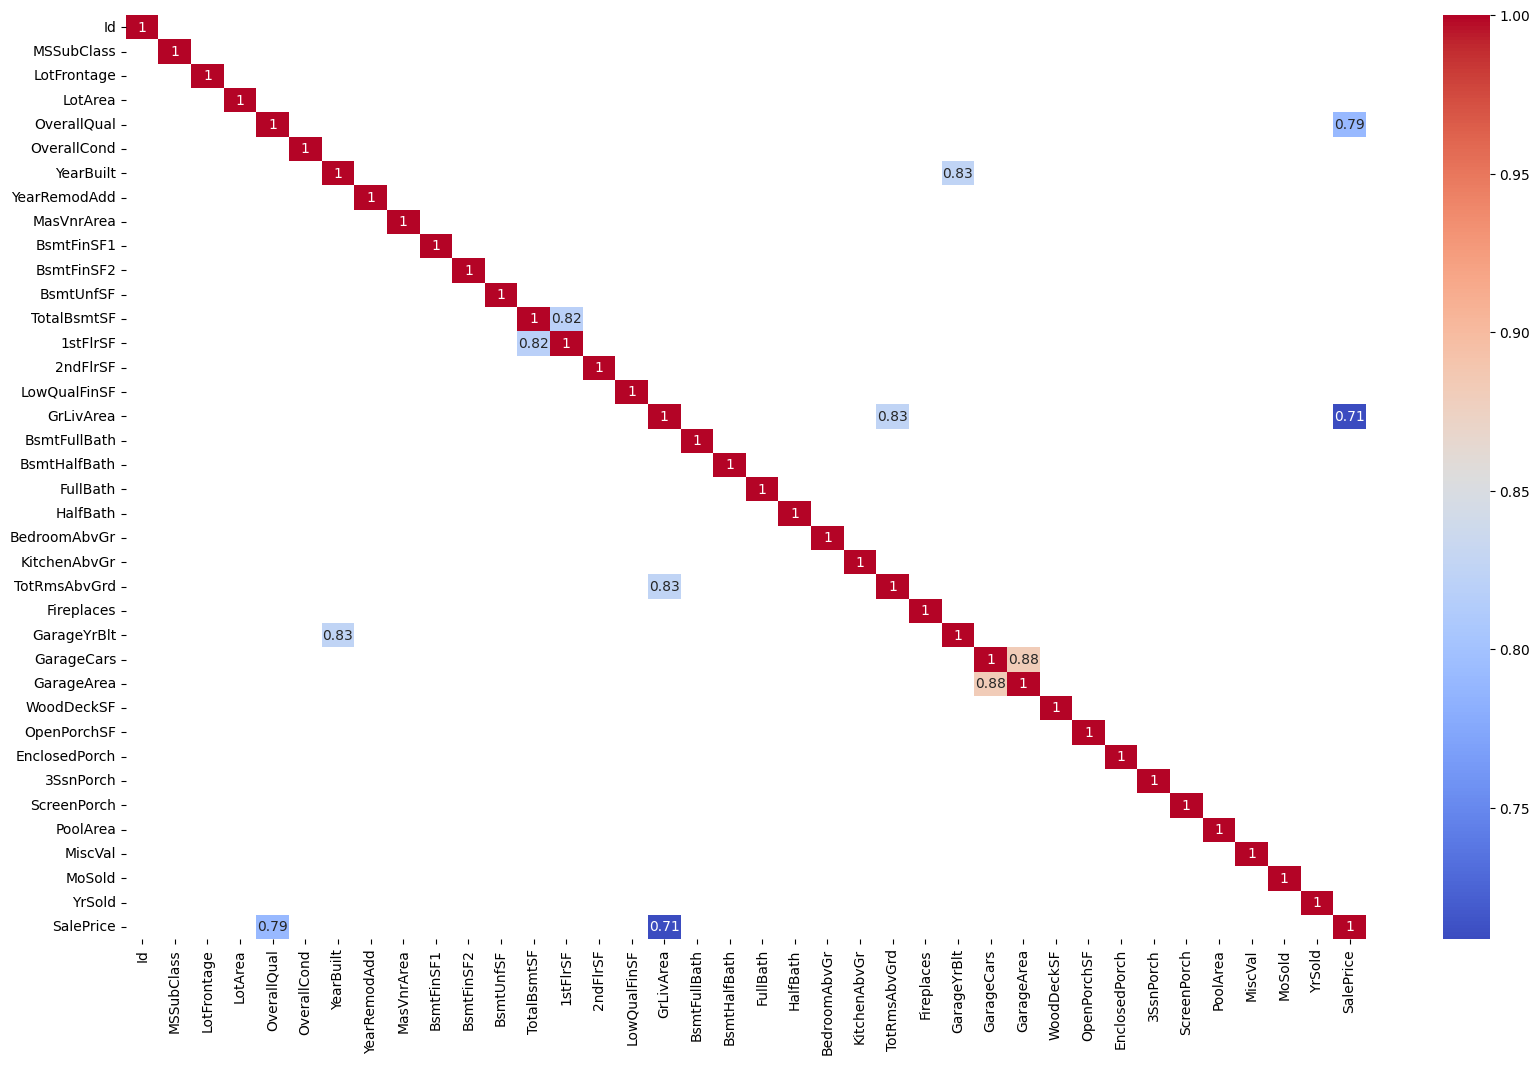

In [93]:
#filter numeric column only

data_num = df_house_price[numerical_var]
data_cat = df_house_price[categorical_var]

#calculating correlation among numeric variable
corr_matrix = data_num.corr()
#filter correlation values above 0.7
filter_corr = corr_matrix[corr_matrix > 0.7]
#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr, cmap="coolwarm", annot=True)

Based on the above correlation matrix, correlation among the variables been observed. For example,
"SalePrice" are correlated with "OverallQual" , "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", and "GarageArea".

It also show the multicollinearity. For example: the correlation between GarageCars and GarageArea is very high (0.88)



### SalePrice


In [94]:
df_house_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


<Axes: xlabel='SalePrice', ylabel='Count'>

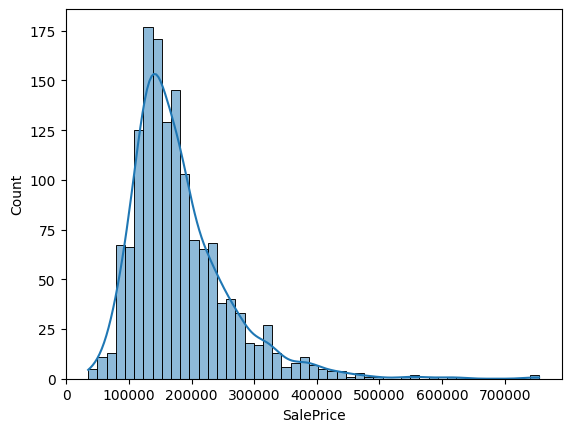

In [95]:
sns.histplot(df_house_price['SalePrice'], kde=True)

In [96]:
# shapiro :
# Null Hypo : Variable is Normally Distributed
# Alter Hypo : Variabe is not Normally Distributed
# # If p is low , nulll will go ( <0.05)
# # if p is high , null will be fly  ( >0.05 )

In [97]:
from scipy.stats import shapiro
shapiro(df_house_price['SalePrice'])

ShapiroResult(statistic=0.8696714665902145, pvalue=3.2061412312022114e-33)

In [98]:
shapiro((df_house_price['SalePrice'])**(1/2))

ShapiroResult(statistic=0.9554806968882322, pvalue=1.1141526583983512e-20)

In [99]:
shapiro(np.log1p(df_house_price['SalePrice']))

ShapiroResult(statistic=0.9912067576971791, pvalue=1.1490744219083482e-07)

In [100]:
# boxcox tranformation  : it tries to convert/transform non normal data to normal but
# does not give the gaurantee that it will convert it into Normal

In [101]:
# box cox method
from scipy.stats import boxcox
value, lambbda=boxcox(df_house_price['SalePrice'])

In [102]:
lambbda

-0.07692397686078907

<Axes: ylabel='Count'>

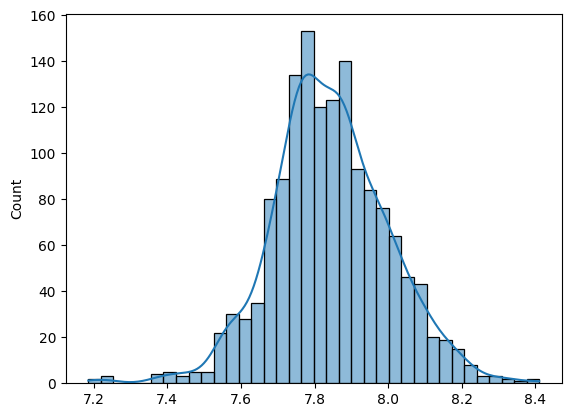

In [103]:
sns.histplot(value, kde=True)

In [104]:
shapiro(value)

ShapiroResult(statistic=0.9915336349809915, pvalue=1.9049827416143877e-07)

In [105]:
# from statsmodels.stats.stattools import jarque_bera

In [106]:
# Jarque Bera Test for Normality
# Used for large dataset
# Null : Data is normal
# Alternative : Data is not Normal
# if p is low ( <0.05 ) : data is not normal
# if p is high ( >0.05) : Data is normal

In [107]:
# jarque_bera(df_house_price["SalePrice"])

In [108]:
# jarque_bera(value)

In [109]:
# log all types of log
# square , square root
# cube , cube root
# inverse ( -3,-2,-1)  : 1/(y)^3, 1/(y)^2, 1/(y)^1
# power ( 3,2)  : y^3, y^2,

From the above result, We can notice that values of "SalePrice" are not a normal distribution. It is positively skewed.

A Few people have very expensive house

### Relationship with numerical variables


### Overall Quality

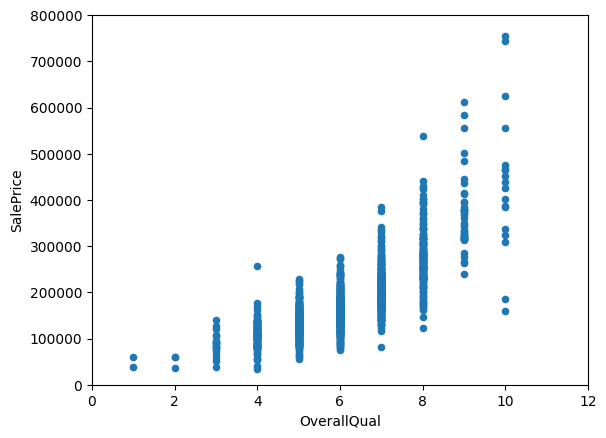

In [110]:
#scatter plot OverallQual/saleprice
data = df_house_price[["SalePrice","OverallQual"]]
data.plot.scatter(x="OverallQual", y="SalePrice", ylim=(0,800000), xlim=(0,12));

From the above result, We can say that the price of the house will be when the overall quality of the house is high. We can notice that for the same quality different price. Why?.
"SalePrice" is correlated with other variables and "OverallQual" might be correlated with other variables.

### Year Built


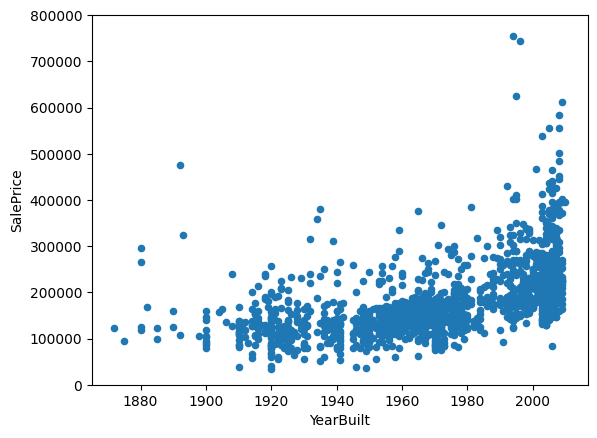

In [111]:
#scatter plot YearBuilt/saleprice
data = df_house_price[["SalePrice", "YearBuilt"]]
data.plot.scatter(x="YearBuilt", y="SalePrice", ylim=(0,800000));

From the above plot, we can observe that the price of a house is comparatively more than the house was built recently. We also can notice that there are some outlier which means even if the house is too old, the price of the house is moderately high due to influences of other variables.

### Ground Living Area

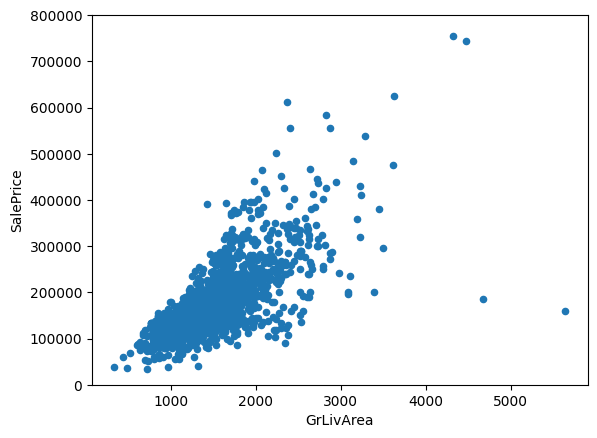

In [112]:
#scatter plot grlivarea/saleprice
data = pd.concat([df_house_price["SalePrice"], df_house_price["GrLivArea"]],axis=1)
data.plot.scatter(x="GrLivArea", y="SalePrice", ylim=(0,800000));

While the size of the ground living area is increasing, the price of the houses is increasing. But
even if the ground living area is high, the price of the house is low and when the ground living area is high, the price of the house is too high. Why?.

We know the influence of other variables affects the price change of house.

When "GrLivArea" of a house is highly correlated with other variables, the price of the house is increasing and when "GrLivArea" of a house is not highly correlated with other variables, the price of the house is decreasing.

### TotalBsmtSF

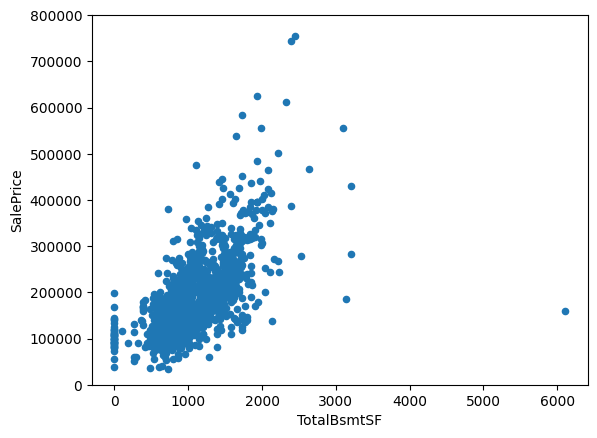

In [113]:
data = pd.concat([df_house_price["SalePrice"],df_house_price["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0,800000));

We can notice that "SalePrice" and "TotalBsmtSF" is with a linear relationship. We can see the value of "SalePrice" is going straight when the value of "TotalBsmtSF" is 0. Total square feet of basement area of a house is high but the price of the house is low due to the influence of other variables.


### Visualizing categorical variables with "SalePrice".


### House Style

<Axes: title={'center': 'SalePrice'}, xlabel='HouseStyle'>

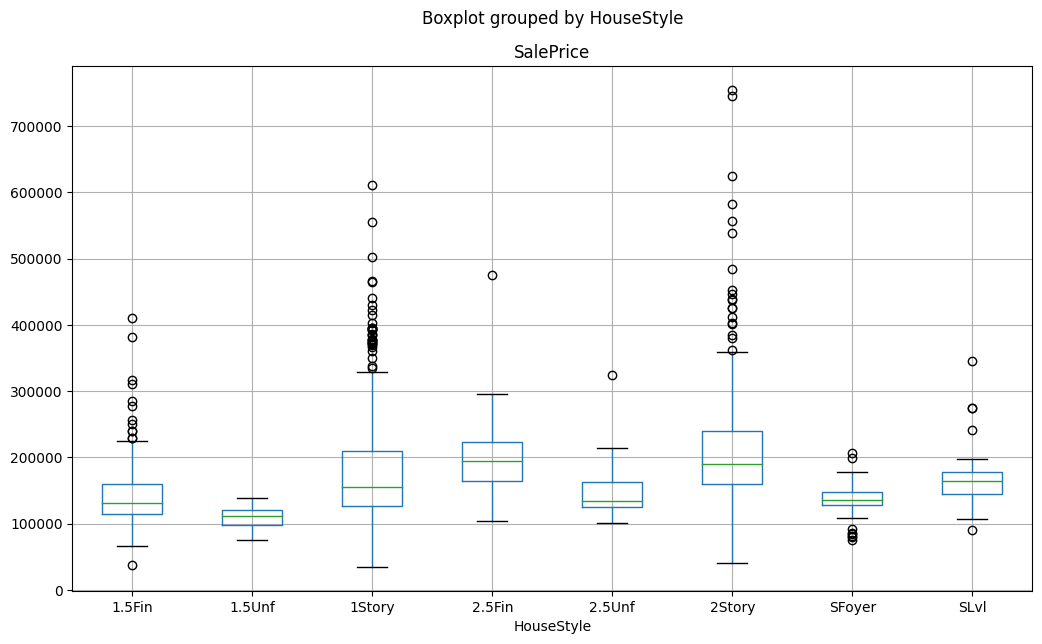

In [114]:
df_house_price.boxplot(column="SalePrice",        # Column to plot
                 by= "HouseStyle",         # Column to split upon
                 figsize= (12,7))

### Foundation

<Axes: title={'center': 'SalePrice'}, xlabel='Foundation'>

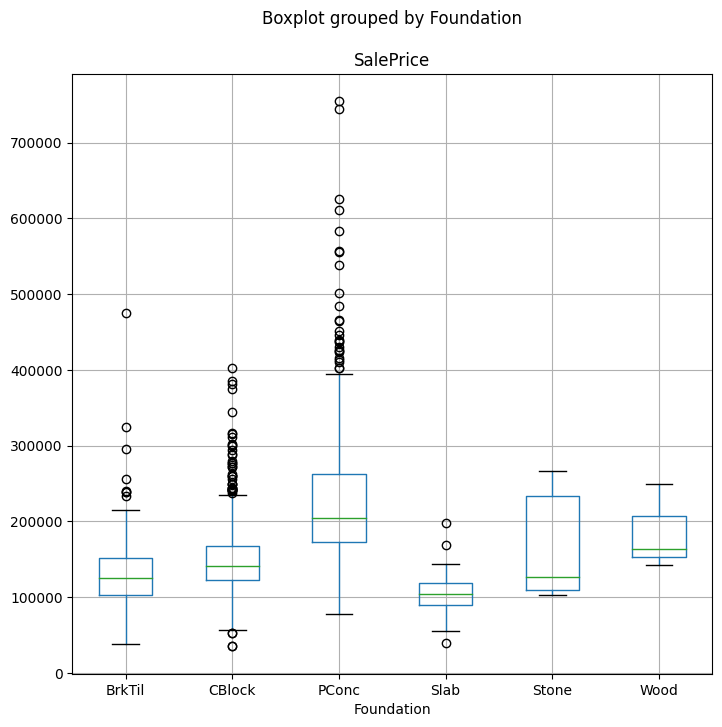

In [115]:
df_house_price.boxplot(column="SalePrice",        # Column to plot
                 by= "Foundation",         # Column to split upon
                 figsize= (8,8))


From the above plot, we can observe that if a house has "Poured Concrete" foundation, the price of the house is higher than other house prices.

### Garage Quality

<Axes: title={'center': 'SalePrice'}, xlabel='GarageQual'>

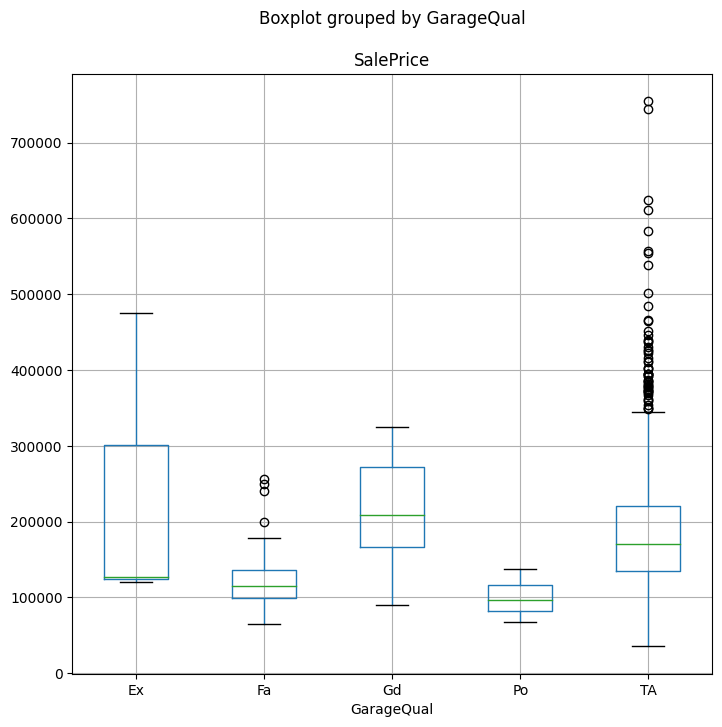

In [116]:

df_house_price.boxplot(column="SalePrice",        # Column to plot
                 by= "GarageQual",         # Column to split upon
                 figsize= (8,8))

From the above plot, we can observe that if a house has a good garage, the price of the house is higher than other house prices. Some houses have an excellent garage. So the price of this kind of house is higher than all.

So far, we have compared some variables with the target variable. We observed that what is the variables impact on target variable based EDA. If we want to reduce dimension, we can take only impact variables. This is one kind of way. Now we will use PCA to reduce the dimension of this dataset.

### Before apply PCA we have to handle missing value.

In [117]:
df_house_price.shape

(1460, 81)

In [118]:
# pd.describe_option('display')

In [119]:
pd.set_option("display.max_rows", 500)

In [120]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    df=df.sort_values(by ="Percentage", ascending=False)
    df=df[df["Missing"]>0]
    return df

In [121]:
missingValues(df_house_price)

,Missing,Percentage
PoolQC,1453,99.521
MiscFeature,1406,96.301
Alley,1369,93.767
Fence,1179,80.753
MasVnrType,872,59.726
FireplaceQu,690,47.260
LotFrontage,259,17.740
GarageYrBlt,81,5.548
GarageCond,81,5.548
GarageType,81,5.548


From above plot, We can see that which variable is correlated with "SalePrice".

### Imputing missing values

PooQC: Data description says NA means "No Pool". In this data set, it has huge ratio of missing value(99%) and majority of houses have no Pool at all in general.

In [122]:
df_house_price["PoolQC"].value_counts(dropna=False)

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

In [123]:
# df_house_price[df_house_price["PoolQC"].notnull()]

In [124]:
df_house_price["PoolQC"] = df_house_price["PoolQC"].fillna("None")

### MiscFeature

Data description says NA means "no misc feature"

In [125]:
df_house_price["MiscFeature"] = df_house_price["MiscFeature"].fillna("None")

### Alley

Data description says NA means "no alley access"

In [126]:
df_house_price["Alley"] = df_house_price["Alley"].fillna("None")

### Fence

This column has NA value means "no fence"

In [127]:
df_house_price["Fence"] = df_house_price["Fence"].fillna("None")

### FireplaceQu

This column has NA means "no fireplace"

In [128]:
df_house_price["FireplaceQu"] = df_house_price["FireplaceQu"].fillna("None")

In [129]:
# df_house_price["LotFrontage"].value_counts()

### LotFrontage

The area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. So we can fill in missing values by the median LotFrontage of the neighborhood.

In [130]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

For each neighborhood, the median LotFrontage is calculated and replaces any missing values in that neighborhood with the neighborhood's median LotFrontage. This ensures that the missing values are filled in a context-aware way, rather than using the overall median.

### GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None


In [131]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_house_price[i] = df_house_price[i].fillna('None')

### GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [132]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_house_price[i] = df_house_price[i].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [133]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_house_price[i] = df_house_price[i].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [134]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_house_price[i] = df_house_price[i].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [135]:
df_house_price["MasVnrType"] = df_house_price["MasVnrType"].fillna("None")
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [136]:
df_house_price["MSZoning"].value_counts(dropna=False)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [137]:
df_house_price['MSZoning'] = df_house_price['MSZoning'].fillna(df_house_price['MSZoning'].mode()[0])


Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.


In [138]:
df_house_price["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [139]:
df_house_price = df_house_price.drop(['Utilities'], axis=1)


Functional : data description says NA means typical

In [140]:
df_house_price["Functional"] = df_house_price["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value

In [141]:
df_house_price["Electrical"].value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

In [142]:
df_house_price['Electrical'] = df_house_price['Electrical'].fillna(df_house_price['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [143]:
df_house_price['KitchenQual'] = df_house_price['KitchenQual'].fillna(df_house_price['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [144]:
df_house_price['Exterior1st'] = df_house_price['Exterior1st'].fillna(df_house_price['Exterior1st'].mode()[0])
df_house_price['Exterior2nd'] = df_house_price['Exterior2nd'].fillna(df_house_price['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [145]:
df_house_price['SaleType'] = df_house_price['SaleType'].fillna(df_house_price['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [146]:
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].fillna("None")

In [147]:
categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]

Transforming some numerical variables that are really categorical

In [148]:
df_house_price['OverallCond'].dtype

dtype('int64')

If we take the variable "OverallCond" which represents rates the overall condition of the house. So value of this column is from 1 to 10.

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
The datatype of this column is in "int64", but it should be in categorical.

So we handle like this column.

In [149]:
df_house_price.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [150]:
#Changing OverallCond into a categorical variable
df_house_price['OverallCond'] = df_house_price['OverallCond'].astype(str)
#MSSubClass=The building class
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].apply(str)
#Year and month sold are transformed into categorical features.
df_house_price['YrSold'] = df_house_price['YrSold'].astype(str)
df_house_price['MoSold'] = df_house_price['MoSold'].astype(str)

In [151]:
df_house_price['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

Label Encoding some categorical variables that may contain information in their ordering set

In [152]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [153]:
df_house_price = pd.get_dummies(df_house_price, drop_first=True)
print(df_house_price.shape)

(1460, 293)


In [154]:
# df_house_price.columns.to_list()

Remove target variable

In [155]:
df_house_price.drop(columns=["Id"], inplace=True)

In [156]:
X = df_house_price.drop('SalePrice',axis=1)
y=df_house_price["SalePrice"]

In [157]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,


### Standardizing input variables

In [158]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# standardized the dataset
sc_x = StandardScaler()
sc_x_fit=sc_x.fit(X)
X_std = sc_x_fit.transform(X)

In [159]:
X_std1=pd.DataFrame(X_std, columns=X.columns)

In [160]:
X_std1.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,

# PCA using sklearn

### Loading PCA module from sklearn
loading pca module from sklearn


We have 221 columns. So first we choose 221 components

In [161]:
X.shape

(1460, 291)

In [162]:
from sklearn.decomposition import PCA

# create instance for pca
sklearn_pca = PCA()
# fit and transform the instance on datad
sklearn_pca_fit=sklearn_pca.fit(X_std1)
pca_result=sklearn_pca_fit.transform(X_std1)

In [165]:
pd.DataFrame(pca_result)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290
0,4.585,2.073,-0.286,-0.821,-1.431,-2.687,-0.658,-1.505,0.247,0.664,0.370,-1.945,-0.718,0.958,0.236,-0.565,-0.955,-0.043,-0.605,0.124,0.301,1.271,0.203,-0.265,-0.534,-0.521,0.350,0.421,-1.662,0.499,-0.250,-0.821,-1.404,0.599,0.058,0.933,0.739,0.281,0.972,-0.225,0.502,0.083,-0.857,-0.461,0.546,-1.437,-0.215,-0.646,-0.078,0.743,-0.717,0.648,-0.353,-0.990,-0.037,0.651,-0.012,-0.065,0.314,0.297,0.466,0.349,0.765,0.184,0.710,0.201,-0.102,0.426,0.916,0.197,-0.055,1.215,0.640,0.079,1.072,0.260,0.573,0.507,-0.569,-0.149,-0.022,-0.875,-0.305,-0.559,0.522,-0.478,-0.318,-0.946,1.146,-0.400,1.386,-0.199,-0.632,-0.066,-0.135,0.624,-0.452,-0.058,-0.184,0.256,0.675,0.735,1.723,-0.978,-0.817,0.609,0.772,-0.444,-0.958,-0.952,-0.083,0.476,0.150,-0.128,-0.395,1.090,-0.306,-0.270,-0.649,0.068,1.443,0.049,0.355,0.289,-0.109,-0.591,-0.221,-0.139,0.884,-0.391,-0.340,0.799,-0.490,-0.245,0.295,-0.399,0.830,0.032,-0.281,-0.269,-0.444,-0.399,-0.366,-0.187,0.279,0.867,0.230,0.551,0.257,0.057,-0.051,-0.162,-0.429,-0.096,-0.216,0.091,0.016,-0.504,-0.412,0.416,-0.072,-0.322,0.167,0.454,-0.300,-0.430,0.156,0.256,-0.084,0.013,-0.143,0.046,-0.324,-0.035,0.200,0.147,-0.075,-0.187,0.277,0.445,0.207,0.003,0.065,0.135,-0.320,-0.083,-0.041,0.338,-0.155,-0.206,-0.064,0.234,-0.164,-0.183,0.173,0.073,0.033,0.116,0.105,-0.148,-0.168,0.224,-0.044,-0.028,0.438,0.276,-0.132,-0.081,0.126,0.145,-0.292,-0.447,0.422,0.078,-0.004,-0.246,-0.058,0.251,0.147,0.273,0.079,-0.007,-0.190,0.148,-0.018,-0.086,0.062,0.084,0.308,-0.204,0.090,0.007,-0.024,0.187,0.104,0.029,0.057,-0.062,-0.184,0.044,-0.172,0.009,0.168,-0.060,0.056,-0.083,0.094,-0.020,-0.010,0.048,-0.074,-0.029,-0.001,-0.016,-0.018,-0.137,0.038,-0.030,-0.005,-0.009,-0.049,-0.015,-0.024,-0.035,-0.068,0.009,-0.064,0.010,-0.005,-0.019,-0.017,-0.010,0.020,-0.004,0.011,-0.004,-0.008,-0.002,0.006,-0.003,0.004,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
1,0.102,-2.999,0.066,-0.719,0.831,-0.200,0.846,-1.144,0.834,-0.337,-0.926,-1.127,0.515,0.659,0.237,1.182,2.697,1.381,-1.231,1.264,0.177,-0.511,-1.463,0.797,0.709,-0.416,-1.071,-1.563,1.689,-2.806,0.852,0.514,1.055,-0.935,0.937,-0.119,0.814,0.343,0.341,0.506,-2.658,-1.128,2.331,-3.036,-2.281,2.160,-2.155,1.312,0.394,-0.156,0.288,-1.207,-0.844,1.267,1.810,1.750,0.036,-1.435,-0.685,1.960,2.813,3.905,0.026,-0.171,0.484,-2.344,-2.145,0.593,0.584,0.677,-2.081,-2.289,-3.078,0.983,0.990,0.059,0.121,-1.148,1.526,0.041,-0.666,-0.587,0.877,-0.168,-0.685,-0.534,-2.380,-0.436,0.591,-0.437,1.364,0.021,0.182,-2.091,0.867,-1.080,-0.080,-0.652,-1.326,-1.405,0.394,1.563,1.942,2.035,0.926,0.832,-0.455,0.486,-0.141,-0.021,0.848,-0.881,2.046,-0.321,-0.206,-0.248,-2.950,0.353,1.840,-2.228,-0.133,1.285,-0.561,0.633,0.019,-0.624,-0.735,-0.641,-0.416,1.462,-0.797,-1.145,0.280,-0.458,-2.438,-2.582,-2.066,0.388,-2.308,1.498,0.687,-0.656,-2.015,0.244,0.528,0.908,-0.064,-1.023,1.284,0.277,-0.416,2.210,-0.447,-0.714,-0.052,2.507,-0.821,1.511,1.517,0.008,1.

In [166]:
# pd.DataFrame(pca_result, columns=['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8', 'Pc9', 'Pc10', 'Pc11', 'Pc12', 'Pc13', 'Pc14', 'Pc15', 'Pc16', 'Pc17', 'Pc18', 'Pc19', 'Pc20', 'Pc21', 'Pc22', 'Pc23', 'Pc24', 'Pc25', 'Pc26', 'Pc27', 'Pc28', 'Pc29', 'Pc30', 'Pc31', 'Pc32', 'Pc33', 'Pc34', 'Pc35', 'Pc36', 'Pc37', 'Pc38', 'Pc39', 'Pc40', 'Pc41', 'Pc42', 'Pc43', 'Pc44', 'Pc45', 'Pc46', 'Pc47', 'Pc48', 'Pc49', 'Pc50', 'Pc51', 'Pc52', 'Pc53', 'Pc54', 'Pc55', 'Pc56', 'Pc57', 'Pc58', 'Pc59', 'Pc60', 'Pc61', 'Pc62', 'Pc63', 'Pc64', 'Pc65', 'Pc66', 'Pc67', 'Pc68', 'Pc69', 'Pc70', 'Pc71', 'Pc72', 'Pc73', 'Pc74', 'Pc75', 'Pc76', 'Pc77', 'Pc78', 'Pc79', 'Pc80', 'Pc81', 'Pc82', 'Pc83', 'Pc84', 'Pc85', 'Pc86', 'Pc87', 'Pc88', 'Pc89', 'Pc90', 'Pc91', 'Pc92', 'Pc93', 'Pc94', 'Pc95', 'Pc96', 'Pc97', 'Pc98', 'Pc99', 'Pc100', 'Pc101', 'Pc102', 'Pc103', 'Pc104', 'Pc105', 'Pc106', 'Pc107', 'Pc108', 'Pc109', 'Pc110', 'Pc111', 'Pc112', 'Pc113', 'Pc114', 'Pc115', 'Pc116', 'Pc117', 'Pc118', 'Pc119', 'Pc120', 'Pc121', 'Pc122', 'Pc123', 'Pc124', 'Pc125', 'Pc126', 'Pc127', 'Pc128', 'Pc129', 'Pc130', 'Pc131', 'Pc132', 'Pc133', 'Pc134', 'Pc135', 'Pc136', 'Pc137', 'Pc138', 'Pc139', 'Pc140', 'Pc141', 'Pc142', 'Pc143', 'Pc144', 'Pc145', 'Pc146', 'Pc147', 'Pc148', 'Pc149', 'Pc150', 'Pc151', 'Pc152', 'Pc153', 'Pc154', 'Pc155', 'Pc156', 'Pc157', 'Pc158', 'Pc159', 'Pc160', 'Pc161', 'Pc162', 'Pc163', 'Pc164', 'Pc165', 'Pc166', 'Pc167', 'Pc168', 'Pc169', 'Pc170', 'Pc171', 'Pc172', 'Pc173', 'Pc174', 'Pc175', 'Pc176', 'Pc177', 'Pc178', 'Pc179', 'Pc180', 'Pc181', 'Pc182', 'Pc183', 'Pc184', 'Pc185', 'Pc186', 'Pc187', 'Pc188', 'Pc189', 'Pc190', 'Pc191', 'Pc192', 'Pc193', 'Pc194', 'Pc195', 'Pc196', 'Pc197', 'Pc198', 'Pc199', 'Pc200', 'Pc201', 'Pc202', 'Pc203', 'Pc204', 'Pc205', 'Pc206', 'Pc207', 'Pc208', 'Pc209', 'Pc210', 'Pc211','Pc212', 'Pc213', 'Pc214', 'Pc215', 'Pc216', 'Pc217', 'Pc218', 'Pc219', 'Pc220'])

In [170]:
pd.DataFrame({"Variance":sklearn_pca_fit.explained_variance_}).head()

,Variance
0,17.880
1,8.588
2,7.573
3,6.584
4,6.267


In [173]:
Eigen=pd.DataFrame({"Eigen_Value":sklearn_pca_fit.explained_variance_  ,
                    "Cumm_variance":sklearn_pca_fit.explained_variance_ratio_.cumsum()})
Eigen.head()

,Eigen_Value,Cumm_variance
0,17.880,0.061
1,8.588,0.091
2,7.573,0.117
3,6.584,0.140
4,6.267,0.161


In [179]:
n_Comp = Eigen[Eigen["Eigen_Value"]>=1]
n_Comp

,Eigen_Value,Cumm_variance
0,17.880,0.061
1,8.588,0.091
2,7.573,0.117
3,6.584,0.140
4,6.267,0.161
5,5.385,0.180
6,4.176,0.194
7,4.081,0.208
8,3.443,0.220
9,3.420,0.231


In [ ]:
# var=pd.concat([pd.DataFrame(sklearn_pca_fit.explained_variance_), pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_),pd.DataFrame(sklearn_pca_fit.explained_variance_ratio_).cumsum(axis=0) ], axis=1)
# var.columns=["eigen","Ratio", "Ratio_Cum"]
# var.to_csv("D:\Training\Imarticus\PGA\PGA16W\Week21\PCA.csv")

In [ ]:
# os.getcwd()

In [180]:
n_Comp.shape[0]

103

In [181]:
pcs103=PCA(n_components = n_Comp.shape[0])
pcs103_fit=pcs103.fit(X_std1)
X_pcs=pcs103_fit.transform(X_std1)

In [189]:
pca_cols = [f'PC{n}' for n in range(n_Comp.shape[0])]

x_pcs_reg=pd.DataFrame(X_pcs,columns=pca_cols)
x_pcs_reg

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102
0,4.585,2.073,-0.286,-0.821,-1.431,-2.687,-0.658,-1.505,0.247,0.665,0.369,-1.946,-0.718,0.957,0.237,-0.568,-0.955,-0.035,-0.603,0.131,0.299,1.277,0.193,-0.268,-0.549,-0.520,0.355,0.424,-1.652,0.487,-0.258,-0.818,-1.384,0.620,0.050,0.934,0.714,0.315,0.970,-0.185,0.497,0.086,-0.905,-0.452,0.500,-1.436,-0.098,0.695,0.020,0.789,-0.645,0.682,-0.478,-0.838,-0.132,0.627,0.020,-0.102,0.273,-0.472,0.490,0.460,0.745,0.197,-0.484,-0.681,-0.450,0.430,-0.775,0.010,-0.001,0.795,-1.074,0.560,-0.865,-0.254,-0.428,-0.893,0.247,0.064,0.009,-0.893,-0.091,-1.222,0.263,0.114,0.325,-0.458,0.444,0.356,-1.236,1.357,0.323,0.642,0.548,0.623,-0.429,0.479,0.635,0.156,-0.004,-1.701,1.414
1,0.102,-2.999,0.066,-0.719,0.831,-0.200,0.846,-1.143,0.834,-0.340,-0.924,-1.125,0.516,0.660,0.241,1.180,2.693,1.382,-1.239,1.252,0.183,-0.528,-1.444,0.800,0.719,-0.423,-1.076,-1.561,1.709,-2.802,0.835,0.490,0.961,-0.920,0.920,-0.110,0.787,0.302,0.338,0.438,-2.662,-1.092,1.917,-3.137,-2.431,2.081,-2.351,-1.531,0.405,-0.281,-0.025,-1.222,-0.598,1.072,1.704,1.712,0.005,-1.119,-1.398,-1.791,2.664,3.687,-0.326,0.771,-1.807,1.719,-1.671,1.135,1.375,0.914,-2.981,-2.301,1.568,0.073,-1.024,-0.413,-0.417,1.926,0.676,-0.600,0.657,-0.516,0.245,-0.681,0.690,-1.191,1.934,-1.178,1.366,-0.927,-0.949,2.245,-0.911,0.883,-0.078,0.232,2.357,0.095,-0.173,-0.522,-0.909,-0.510,0.224
2,5.298,1.729,0.087,-0.069,-0.657,-2.614,-0.188,-2.170,0.047,0.068,0.515,-1.747,-0.445,0.609,0.123,-0.899,-0.626,0.207,-0.255,0.363,-0.130,0.719,-0.081,-0.032,-0.371,-0.027,1.072,0.845,-0.811,-0.212,-0.052,-0.816,-1.174,0.255,-0.113,1.002,0.348,-0.540,1.057,-0.108,-0.139,-0.315,-0.143,0.312,0.002,-0.983,-0.521,-0.687,0.369,1.350,-1.102,-0.622,-0.065,-0.484,0.836,0.119,0.608,0.482,-0.139,-1.412,0.175,0.457,0.046,-0.858,-0.672,-1.643,-0.355,-1.304,0.962,-1.029,0.351,0.033,-0.124,0.222,-0.810,1.696,0.213,-1.626,0.660,0.481,1.088,-0.207,0.673,0.318,1.377,0.343,-0.583,-0.498,-0.197,0.257,-0.234,-0.187,1.122,-0.673,-0.308,0.231,-0.383,0.100,0.172,-0.676,-0.308,-0.388,0.771
3,-0.976,0.739,-1.473,3.401,-1.153,1.529,0.470,-1.096,-1.821,-1.014,-0.467,-0.488,-0.177,-2.057,-0.879,0.977,-0.086,1.224,-1.168,-1.772,1.552,-0.317,-0.762,0.630,0.167,1.907,3.123,-0.178,-0.180,1.443,0.786,-0.047,1.711,0.424,1.243,0.742,-1.410,0.633,-0.298,-0.271,-0.120,0.177,0.365,1.146,2.226,0.788,-0.498,0.018,-0.051,-1.659,1.960,0.710,-1.383,-1.777,-0.193,0.673,1.066,-1.481,-0.134,1.004,0.046,-0.361,0.379,-0.592,-0.221,-1.081,-0.604,-0.767,-1.241,1.130,-0.212,-0.033,-2.295,-1.258,-3.160,-1.253,-1.130,0.249,0.596,2.384,-1.021,-2.016,0.510,-1.217,-0.722,-1.302,-0.850,-1.090,2.561,1.004,-1.023,1.388,1.026,-0.318,0.240,0.534,-0.688,-0.526,-0.165,-0.068,0.374,-2.164,0.891
4,6.824,1.431,0.519,2.083,0.087,-3.195,-0.359,-1.447,0.352,0.034,1.554,-2.432,-0.550,0.928,-0.075,-0.078,0.276,0.085,-0.563,0.579,-0.075,1.048,0.723,-1.145,0.145,0.297,-0.931,-0.257,0.640,-0.913,0.090,-0.568,-0.063,0.330,-0.612,-0.900,-0.041,-0.361,0.991,-0.832,0.191,0.058,0.593,-0.608,-0.413,1.386,-0.684,-0.203,0.971,0.012,-1.197,0.040,-0.448,0.324,1.441,0.769,-0.487,0.291,0.298,-0.113,-1.056,1.537,1.143,0.377,-1.031,-0.043,-0.944,-0.470,-0.012,0.594,-0.833,-1.018,0.923,-1.626,-1.443,-0.165,0.140,-0.030,0.280,0.341,-0.595,0.208,-1.994,-1.149,1.163,-0.527,-0.390,2.087,1.059,0.045,0.490,0.979,1.474,-0.841,0.143,0.729,-1.269,0.692,0.552,-0.977,-0.631,0.395,-1.271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [190]:
y=df_house_price["SalePrice"]

In [191]:
import time
tic=time.time()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_pcs_reg, y)
toc =time.time()
print("Time Taken", toc-tic)

Time Taken 0.0187380313873291


In [192]:
lr.score(x_pcs_reg, y)

0.8424081194054246

In [193]:
tic=time.time()
lr=LinearRegression()
lr.fit(X_std1, y)
lr.score(X_std1, y)
toc =time.time()
print("Time Taken", toc-tic)

Time Taken 0.04117131233215332


In [194]:
lr.score(X_std1, y)

0.9346553677638174

### Model II: Decision Tree

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
tic=time.time()
dt=DecisionTreeRegressor()
dt.fit(X_std1, y)
print(f" Score of model is : {dt.score(X_std1, y)}")
toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 1.0
Time Taken 0.06674695014953613


In [197]:
tic=time.time()
dt=DecisionTreeRegressor()
dt.fit(X_std1, y)
print(f" Score of model is : {dt.score(X_std1, y)}")
toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 1.0
Time Taken 0.06013298034667969


In [198]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [200]:


tic=time.time()
rf.fit(X_std1, y)
print(f" Score of model is : {rf.score(X_std1, y)}")
toc =time.time()
print("Time Taken", toc-tic)



 Score of model is : 0.9799960480758183
Time Taken 1.9187352657318115


In [201]:
tic=time.time()
rf.fit(x_pcs_reg, y)
print(f" Score of model is : {rf.score(x_pcs_reg, y)}")
toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 0.9750334888499174
Time Taken 6.16640305519104


In [202]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [203]:

tic=time.time()
ad.fit(x_pcs_reg, y)
print(f" Score of model is : {ad.score(x_pcs_reg, y)}")
toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 0.8268621927700837
Time Taken 0.749845027923584


In [204]:
tic=time.time()

ad.fit(X_std1, y)
print(f" Score of model is : {ad.score(X_std1, y)}")

toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 0.8735791780315194
Time Taken 0.3475379943847656


### Model III: XGBoost

In [206]:
from xgboost import XGBRegressor

In [207]:
xg=XGBRegressor()

tic=time.time()

xg.fit(X_std1, y)
print(f" Score of model is : {xg.score(X_std1, y)}")

toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 0.9996317229312202
Time Taken 0.3284027576446533


In [208]:
xg=XGBRegressor()

tic=time.time()

xg.fit(x_pcs_reg, y)
print(f" Score of model is : {xg.score(x_pcs_reg, y)}")

toc =time.time()
print("Time Taken", toc-tic)

 Score of model is : 0.9999996728064262
Time Taken 0.6727259159088135
